In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/Minor Final/Dataset/Final_Dataset/Potato_Red.csv")

In [ ]:
temp.drop('Commodity', axis=1, inplace=True)

In [ ]:
temp.head()

,Date,Average
0,6/16/2013,20.5
1,6/17/2013,20.5
2,6/18/2013,19.5
3,6/19/2013,20.5
4,6/20/2013,20.5


In [ ]:
#Normalizing the average column
scaler = MinMaxScaler()
temp['Average'] = scaler.fit_transform(temp['Average'].values.reshape(-1, 1))

In [ ]:
#converting date to datetime format and using date as index
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m-%d-%Y')
temp.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

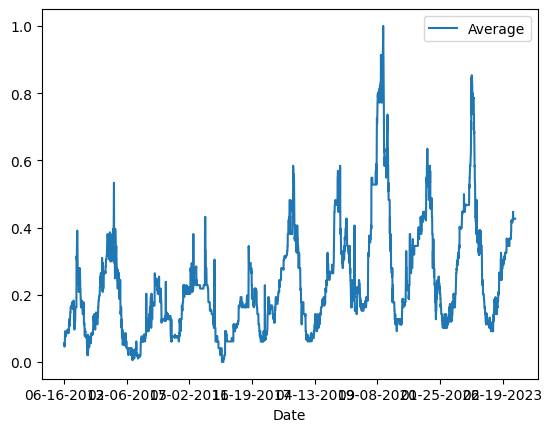

In [ ]:
temp.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)

In [ ]:

X1= np.squeeze(X1)
y1 = np.squeeze(y1)
# Print the new shapes
print(X1.shape, y1.shape)

(3597, 5) (3597,)


In [ ]:
X_train1, y_train1 = X1[:2500], y1[:2500]
X_val1, y_val1 = X1[2500:3000], y1[2500:3000]
X_test1, y_test1 = X1[3000:], y1[3000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2500, 5), (2500,), (500, 5), (500,), (597, 5), (597,))

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError()]
)

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
79/79 [==============================] - 8s 70ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - mean_absolute_error: 0.0632 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0464 - val_mean_absolute_error: 0.0323
Epoch 2/100
79/79 [==============================] - 6s 76ms/step - loss: 7.0090e-04 - root_mean_squared_error: 0.0265 - mean_absolute_error: 0.0155 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mean_absolute_error: 0.0256
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 6.8925e-04 - root_mean_squared_error: 0.0263 - mean_absolute_error: 0.0166 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459 - val_mean_absolute_error: 0.0316
Epoch 4/100
79/79 [==============================] - 1s 6ms/step - loss: 6.7986e-04 - root_mean_squared_error: 0.0261 - mean_absolute_error: 0.0163 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mean_absolute_error: 0.0243
Epoch 5/100
79/79 [===========================

In [ ]:
# model1 = load_model('model1/')

In [ ]:
model1.save("/content/drive/MyDrive/Minor Final/LSTM_Finals model/LSTM_potato_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1 = load_model("/content/drive/MyDrive/Minor Final/LSTM_Finals model/LSTM_potato_model.h5")

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

79/79 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,0.057222,0.065990
1,0.065487,0.091371
2,0.086111,0.076142
3,0.078158,0.081218
4,0.080911,0.086294
...,...,...
2495,0.711150,0.736041
2496,0.748804,0.751269
2497,0.763138,0.776650
2498,0.786551,0.781726


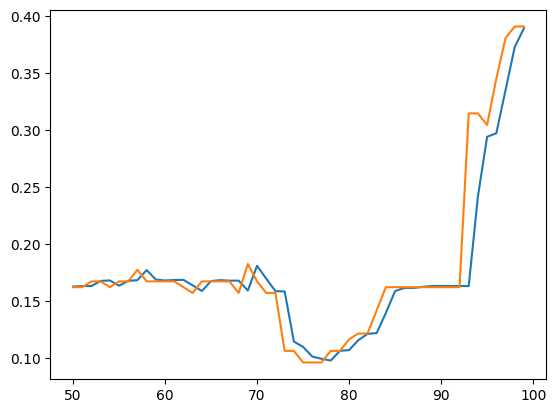

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results.tail()

16/16 [==============================] - 0s 4ms/step


,Val Predictions,Actuals
495,0.205134,0.223350
496,0.223949,0.203046
497,0.205944,0.203046
498,0.203413,0.203046
499,0.204413,0.187817


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

19/19 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,0.188932,0.187817
1,0.187542,0.162437
2,0.164687,0.172589
3,0.172089,0.162437
4,0.163917,0.162437
...,...,...
592,0.423193,0.426396
593,0.423193,0.426396
594,0.423193,0.426396
595,0.423193,0.426396


In [ ]:
#TEST MSE,MAE and RMSC
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, test_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [ ]:
#Print MSE,MAE and RMSC
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.00032535589422290844
Mean Absolute Error (MAE): 0.009929202610316558
Root Mean Squared Error (RMSE): 0.01803762440630441


In [ ]:
# Calculate R^2 score
r2score = r2_score(y_test1, test_predictions)

print("R^2 Score:", r2score)
accuracy_percentage = r2score * 100
print("Accuracy (R^2 Score) in Percentage:", accuracy_percentage)

R^2 Score: 0.988679698876401
Accuracy (R^2 Score) in Percentage: 98.8679698876401


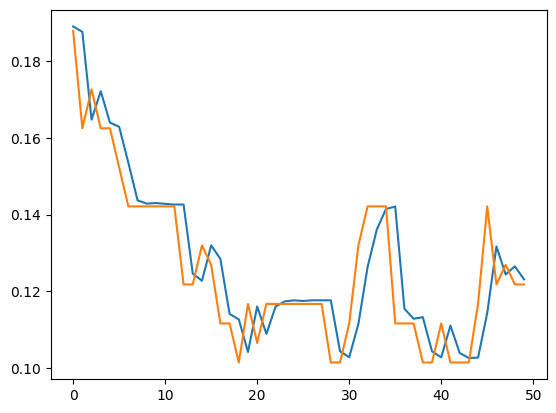

In [ ]:
plt.plot(test_results['Test Predictions'][:50])
plt.plot(test_results['Actuals'][:50])

In [ ]:
future_steps = 30
# Start with the last sequence from the test set
current_sequence = [0.42639594 ,0.42639594 ,0.42639594 ,0.42639594 ,0.42639594]

# Initialize an array to store the forecasted values
forecasted_values = []

# Iterate to predict future steps
for i in range(future_steps):
    # Predict the next value
    next_value_normalized = model1.predict(np.expand_dims(current_sequence, axis=0))[0][0]

    # Denormalize the predicted value
    next_value = scaler.inverse_transform([[next_value_normalized]])[0][0]

    # Append the denormalized predicted value to the forecasted values
    forecasted_values.append(next_value)

    # Update the current sequence by removing the first element and adding the predicted value at the end
    current_sequence = np.append(current_sequence[1:], next_value_normalized)

# Print the forecasted values
print("Forecasted Values for the next", future_steps, "steps:", forecasted_values)

1/1 [==============================] - 0s 21ms/step
Forecasted Values for the next 30 steps: [57.532092347741134, 58.10355173051358, 58.69071619212628, 59.250909015536315, 59.799154236912734, 60.35841356217862, 60.935265511274345, 61.53154772520066, 62.145716115832336, 62.77703386545182, 63.42592956125737, 64.09347467124462, 64.7809725701809, 65.48966792225838, 66.22082006931305, 66.97571477293968, 67.75575521588326, 68.56247961521149, 69.39758470654488, 70.26291400194168, 71.16046366095543, 72.092429459095, 73.06123027205467, 74.06947872042656, 75.12006923556328, 76.21618393063547, 77.3613336980343, 78.55940517783166, 79.81468424201013, 81.13194993138315]


In [ ]:
print(current_sequence)

[0.42639594 0.42639594 0.42639594 0.42639594 0.42639594]


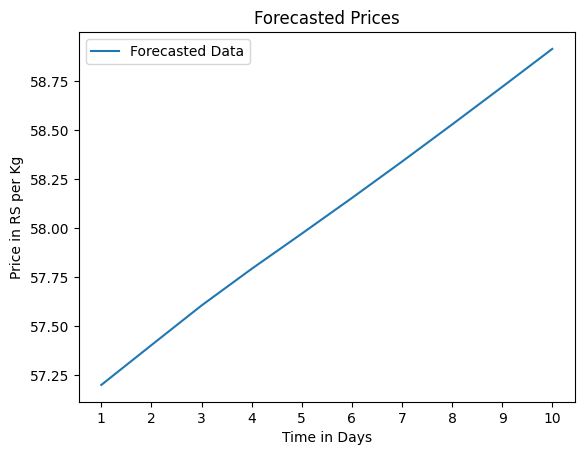

In [ ]:
# Plot forecasted values
plt.plot(range(1, future_steps + 1), forecasted_values, label='Forecasted Data')

# Set labels and title
plt.xlabel('Time in Days')
plt.ylabel('Price in RS per Kg')
plt.title('Forecasted Prices')
plt.legend()

# Set x-axis ticks to show 1, 2, 3, ..., future_steps
plt.xticks(range(1, future_steps + 1))

# Show plot
plt.show()